In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading and Understanding the Data

setting file path

In [2]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


understanding the dataframe

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Cleaning the Data

dropping the car_ID as it is not affecting the car price

In [6]:

df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


checking if the dataframe has any missing values

In [7]:
print(df.isnull().values.any())

False


datafram columns and their respective datatypes

In [8]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

putting all subcategories into a single category

In [9]:
df['CarName']=df['CarName'].str.split(' ',expand=True)
df['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

checking the unique car companies

In [10]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

renaming the typing errors in Car Company Names

syntax : 'wrong one' : 'correct one'

In [0]:

df['CarName']=df['CarName'].replace({'maxda':'mazda',
                                     'nissan':'Nissan',
                                     'toyouta':'toyota',
                                     'porcshce':'porsche',
                                     'vokswagen':'volkswagen',
                                     'vw':'volkswagen'
                                     })

changing symboling to a string datatype from integer as it is mentioned in the dictionary excel file

In [12]:
df['symboling']=df['symboling'].astype(str)
df['symboling'].head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: object

checking for duplicated values

In [13]:
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


thus, we see that there are no duplicate values in the dataframe

Segregation of Numerical and Categorical Variables/Columns

In [0]:
cat_col=df.select_dtypes(include='object').columns
num_col=df.select_dtypes(exclude='object').columns
df_cat=df[cat_col]
df_num=df[num_col]

In [15]:
df_cat.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [16]:
df_num.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


# Visualising the Data

In [17]:
df['CarName'].value_counts()

toyota         32
Nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

visualizing the different car names available

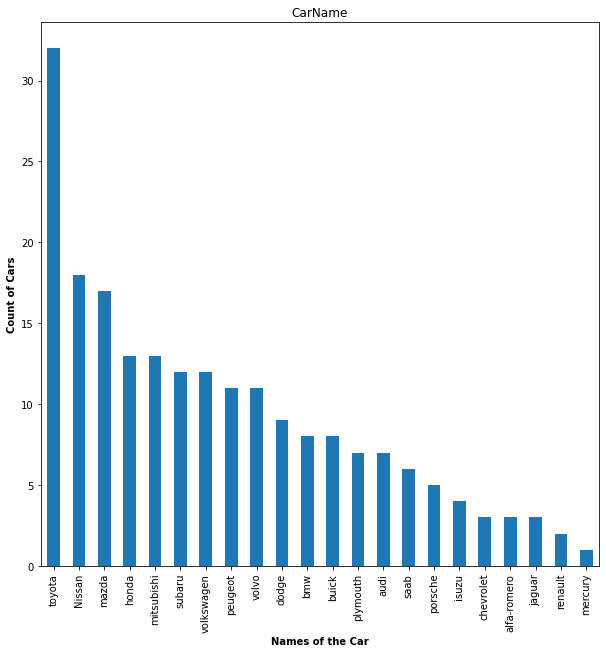

In [18]:
plt.figure(figsize=(10, 10))
ax=df['CarName'].value_counts().plot(kind='bar')
plt.title(label='CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

pairplot, equivalent to correlation graph

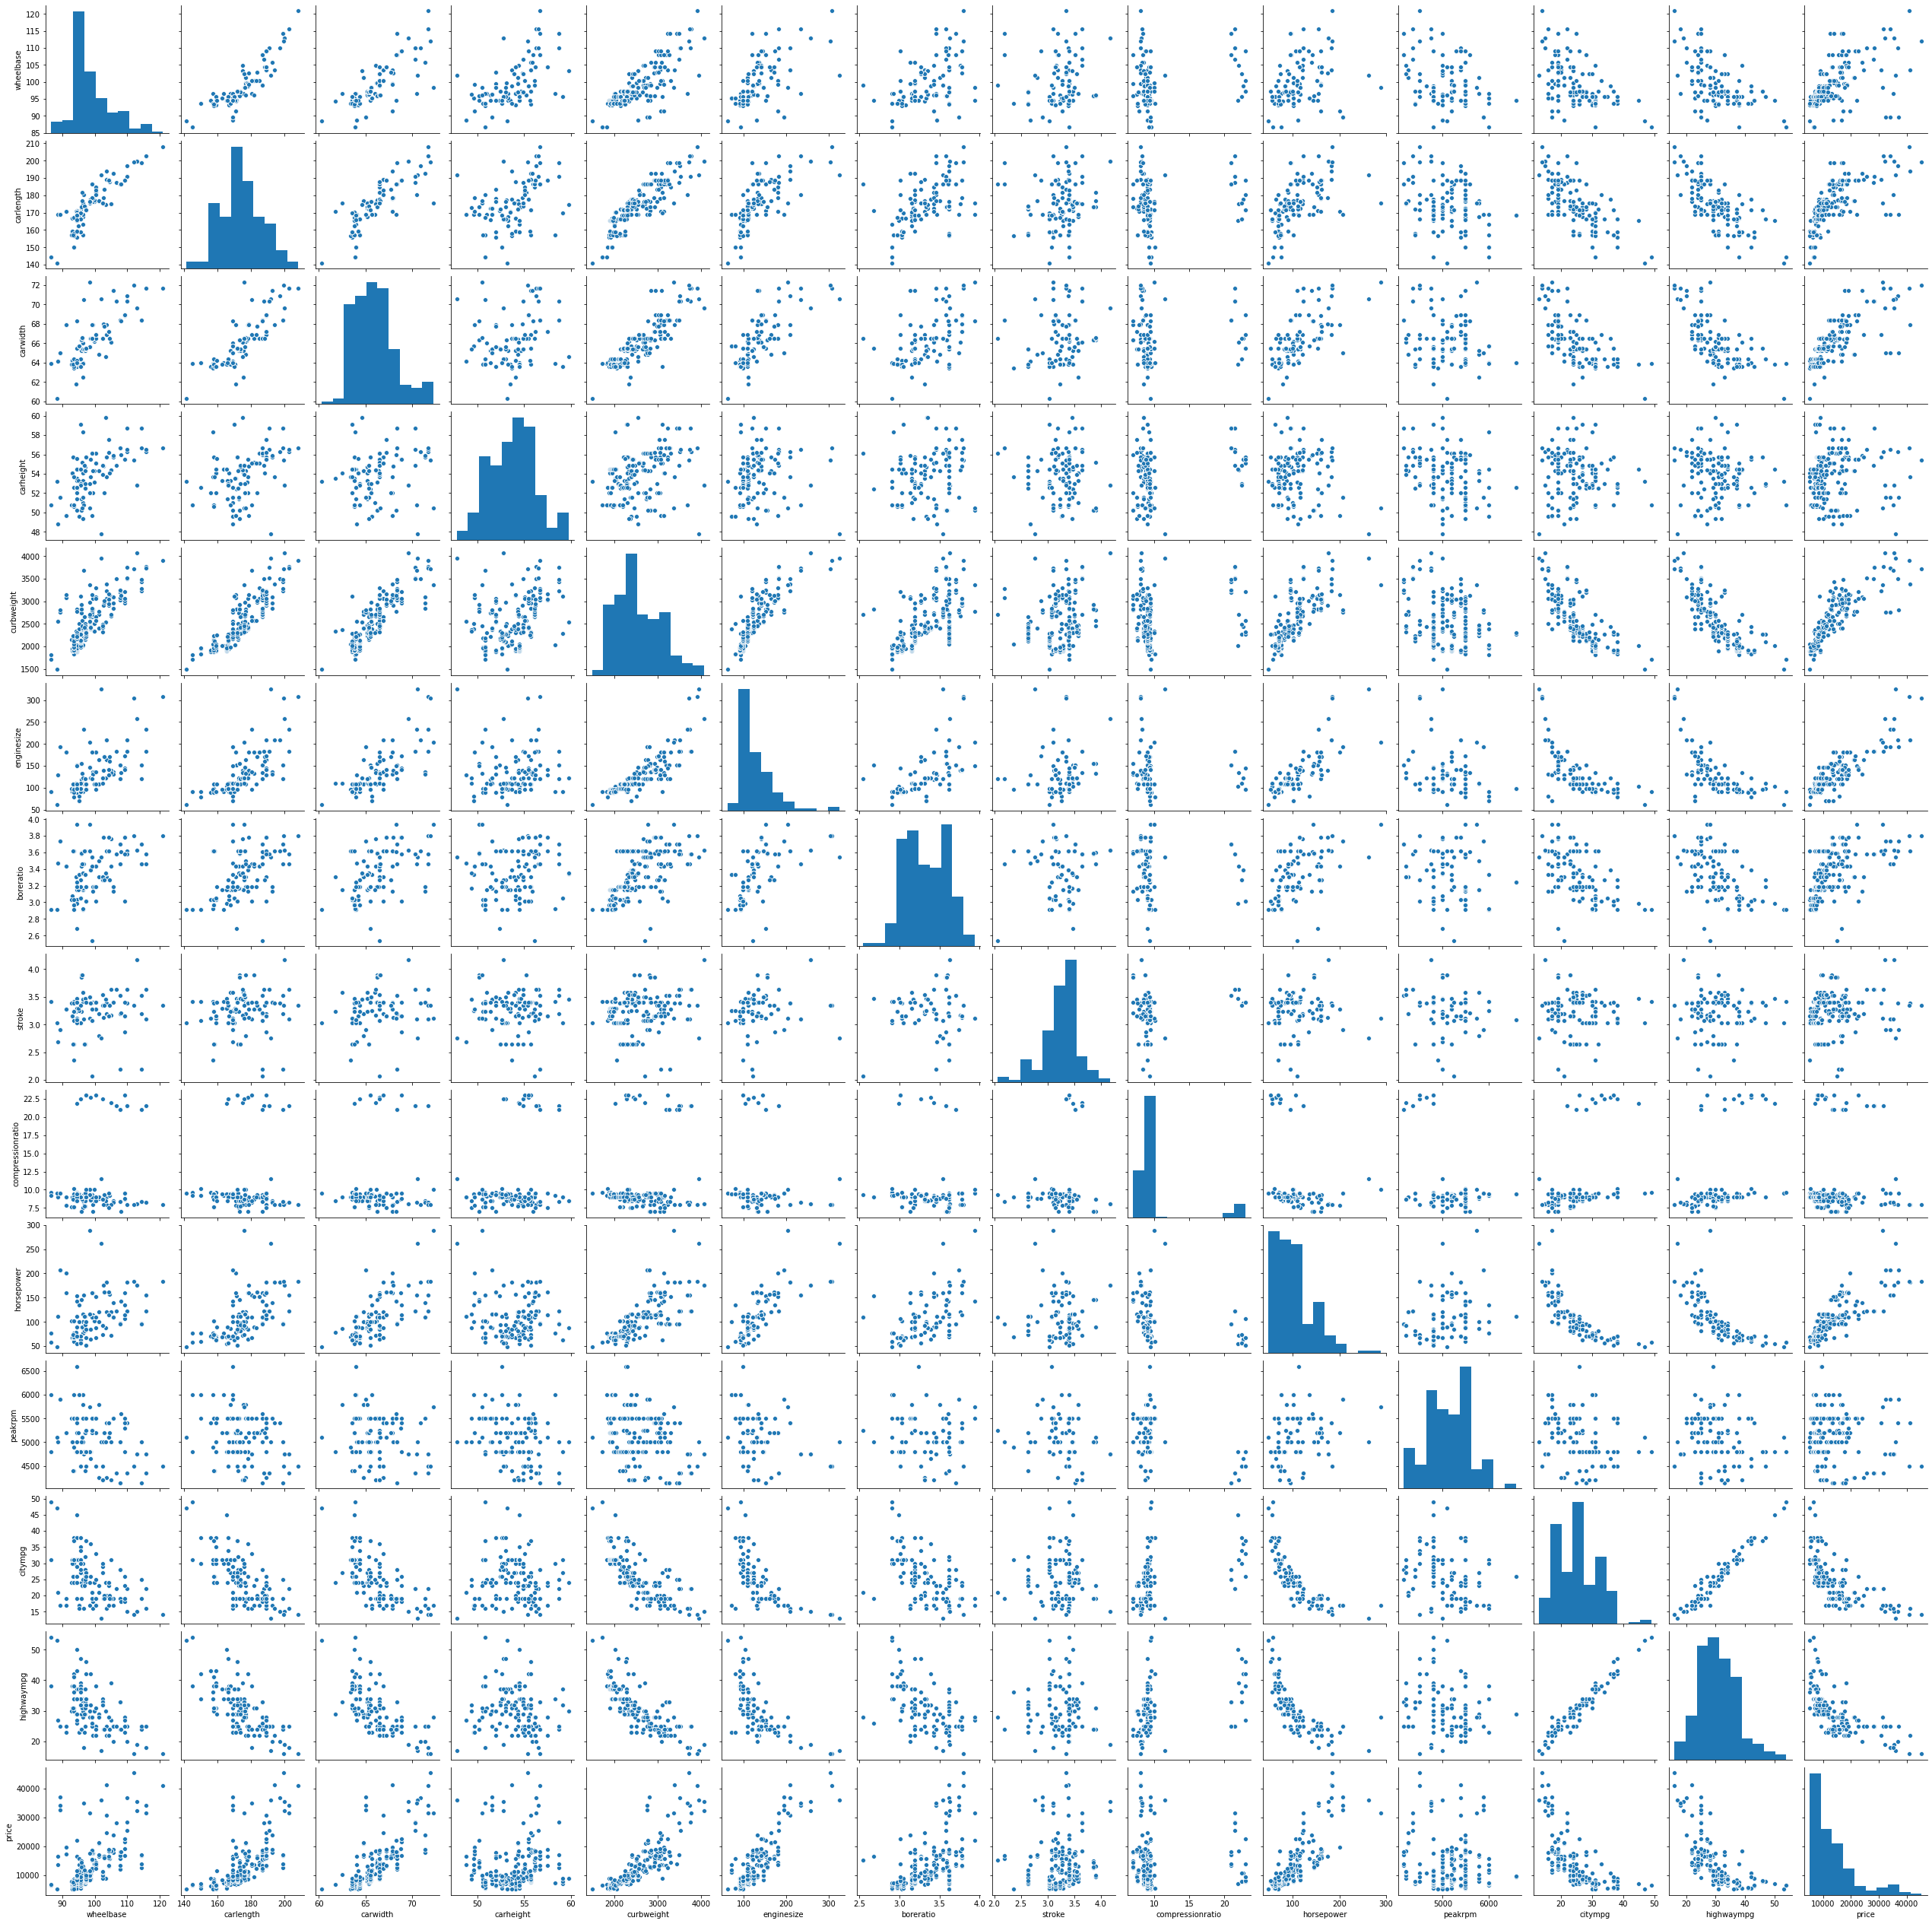

In [19]:
ax=sns.pairplot(df[num_col])
plt.show()

thus, 
*   positive correlation with price : wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, 
*   negative correlation with price : citympg, highwaympg




visualising the categorical data

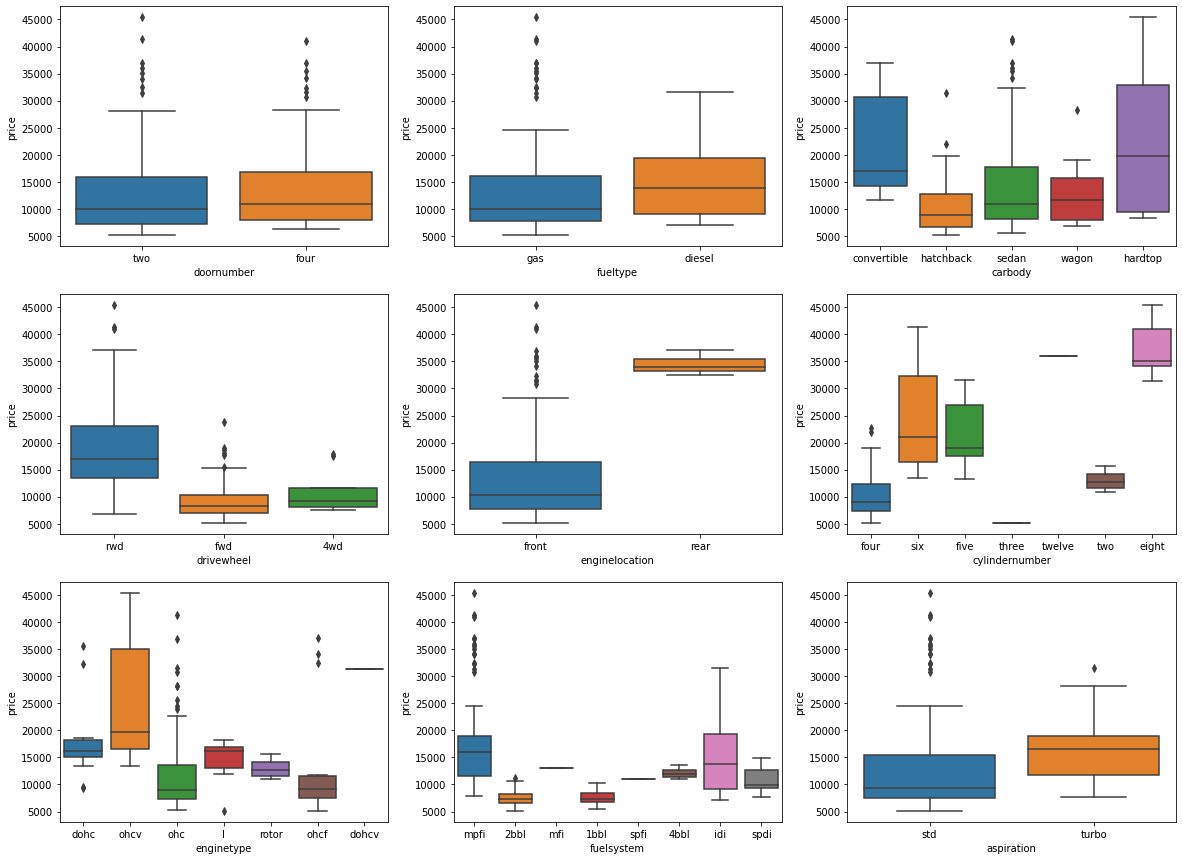

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.show()

car name grouped with respect to their average prices

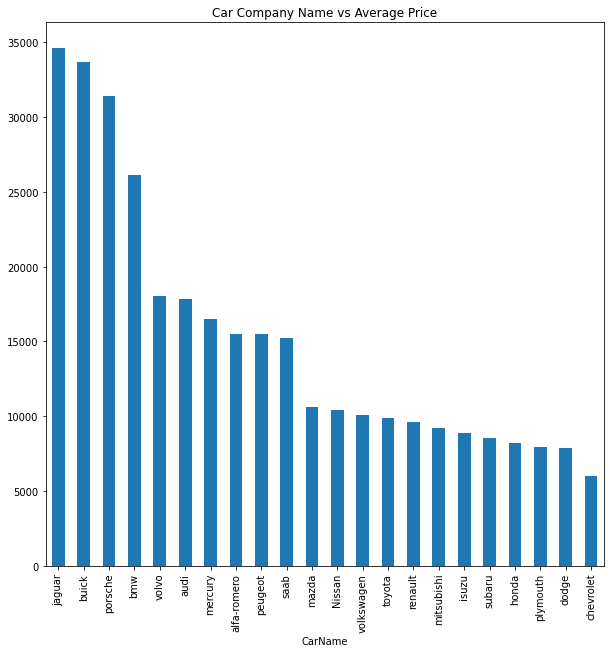

In [21]:
ax=df.groupby(['CarName'])['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
ax.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

thus, we see jaguar has the highest average price

car body grouped with respect to their average prices

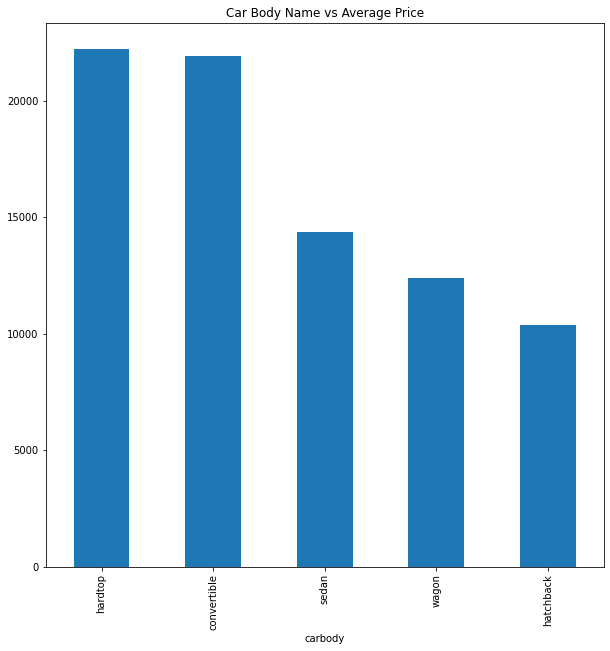

In [22]:
ax=df.groupby(['carbody'])['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
ax.plot.bar()
plt.title('Car Body Name vs Average Price')
plt.show()

thus, car body with hardtop has the highest average price

binning the car companies based on their average prices

In [23]:
df['price'] = df['price'].astype('int')
df_auto_temp = df.copy()
grouped = df_auto_temp.groupby(['CarName'])['price'].mean()
print(grouped)
df_auto_temp = df_auto_temp.merge(grouped.reset_index(), how='left', on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_auto_temp['price_y'], bins, right=False, labels=label)
df.head()

CarName
Nissan         10415.666667
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


significant columns from visualised date:
*   symboling
*   fueltype
*   aspiration
*   carbody
*   drivewheel
*   enginelocation
*   wheelbase
*   carlength
*   carwidth
*   curbweight
*   enginetype
*   boreratio
*   horsepower
*   peakrpm
*   citympg
*   highwaympg  
*   enginesize
*   cylindernumber
*   Cars_Category



In [0]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

updating the dataframe, including only the significant columns

In [0]:
df=df[sig_col]

# Data Preparation

creating dummy variables for sig_cat_col,
<br>
sig_cat_col -> significant categorical columns

In [0]:
sig_cat_col=['Cars_Category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel']

In [27]:
dummies=pd.get_dummies(df[sig_cat_col])
print(dummies.shape)
dummies.head()

(205, 29)


,Cars_Category_Budget_Friendly,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


avoiding dummy trap by removing the first column of each dummy variable

In [28]:
dummies=pd.get_dummies(df[sig_cat_col],drop_first=True)
print(dummies.shape)
dummies.head()

(205, 22)


,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0


concatenating the dataframe with the dummy variables

In [0]:
df=pd.concat([df,dummies],axis=1)

dropping the significant categorial columns as we have already made and added the dummy variables for the same in the dataframe

In [30]:
df.drop(sig_cat_col,axis=1,inplace=True)
df.shape

(205, 32)

# Splitting the dataset into training and test sets

In [31]:
df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,23,28,188.8,68.9,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
201,19045,109.1,3049,141,3.78,160,19,25,188.8,68.8,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
202,21485,109.1,3012,173,3.58,134,18,23,188.8,68.9,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
203,22470,109.1,3217,145,3.01,106,26,27,188.8,68.9,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


With the seed reset (every time), the same set of numbers will appear every time. We specify this so that the train and test data set always have the same rows, respectively

We divide the df into 70/30 ratio

In [0]:
np.random.seed(0) 

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state = 100)

In [33]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,7609,93.7,2191,98,2.97,68,31,38,167.3,63.8,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,22018,94.5,2778,151,3.94,143,19,27,168.9,68.3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,26,29,168.7,64.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,18950,104.3,3157,130,3.62,162,17,22,188.8,67.2,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1


#Rescaling the features
Rescaling the data using Standardisation Scaling.
Scaling needs to be done on the significant num columns.
The significant categorical columns have already been converted into dummies 

In [0]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

sig_num_col -> significant num columns

In [0]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

applying scaler() to all the columns except the 'dummy' variables

In [0]:
df_train[sig_num_col]=scaler.fit_transform(df_train[sig_num_col])

In [37]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,-0.700200,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.487238,-0.924500,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,1.151931,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,-0.359789,1.114978,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,-0.452246,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.375720,-0.833856,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.442648,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,-0.367754,-0.788535,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,0.757571,0.972390,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,1.225364,0.616439,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1


checking the correlation co-efficients to see which variables are highly correlated

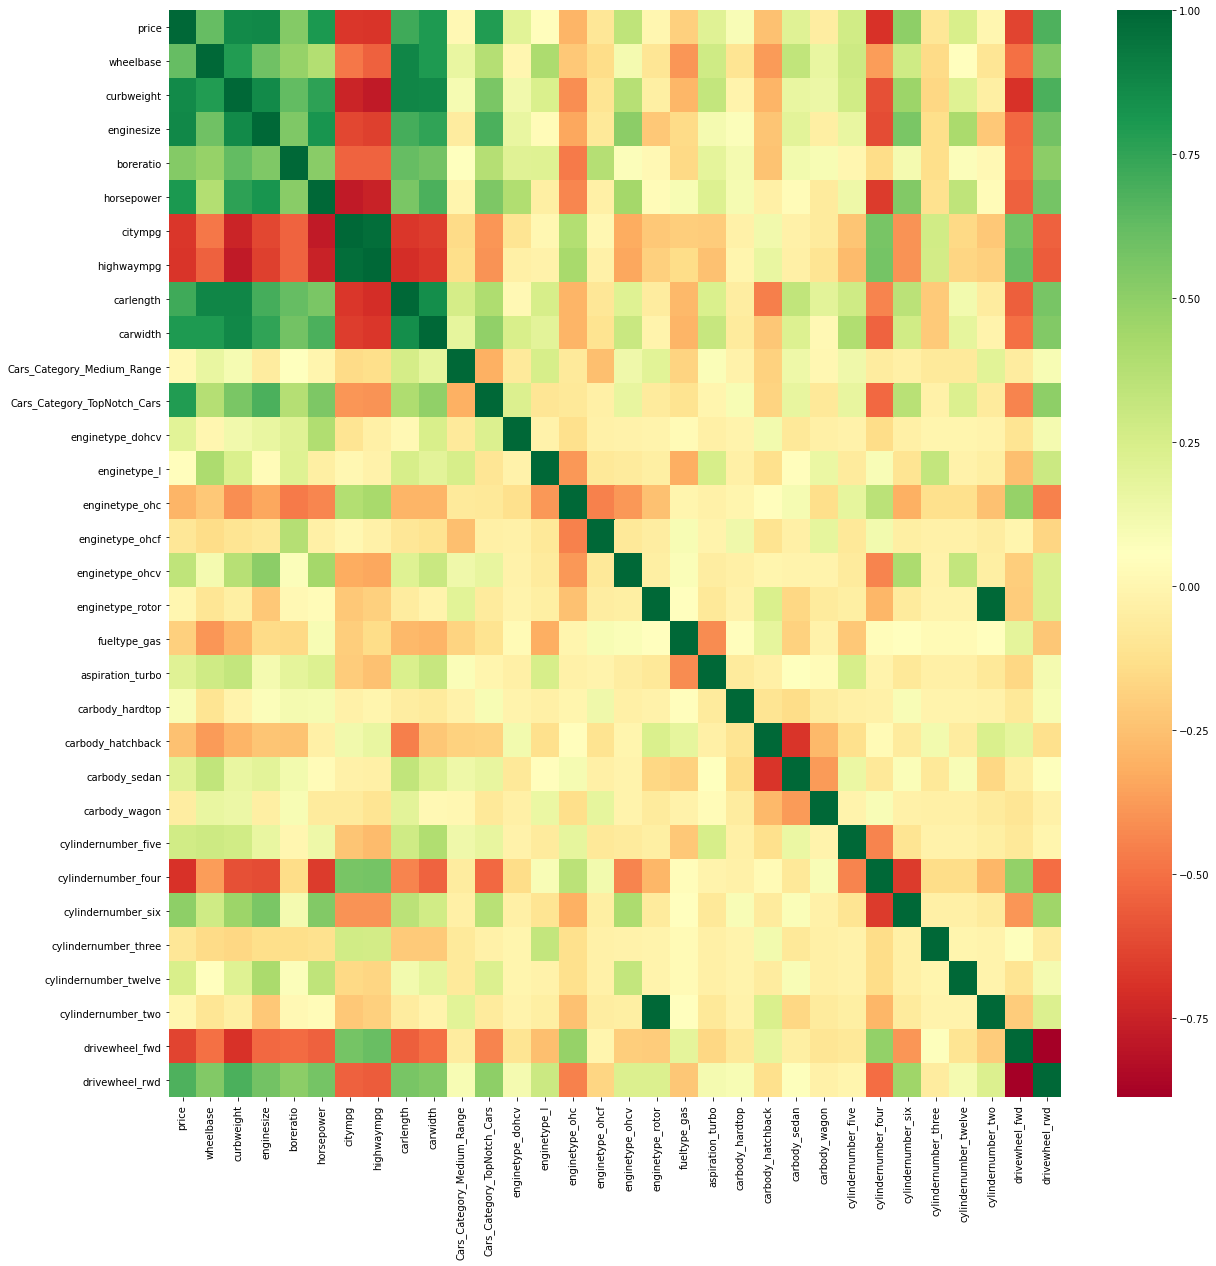

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), cmap= 'RdYlGn')
plt.show()

#Splitting train dataset into x_train and y_train

In [0]:
y_train=df_train.pop('price')

In [0]:
x_train=df_train

# Building Linear Model

In [0]:
import statsmodels.api as sm

x_train_copy = x_train

In [0]:
x_train_copy1=sm.add_constant(x_train_copy['horsepower'])

#1st model
lr1=sm.OLS(y_train,x_train_copy1).fit()

In [43]:
lr1.params

const         7.112366e-17
horsepower    8.061819e-01
dtype: float64

In [44]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Fri, 01 May 2020   Prob (F-statistic):           6.05e-34
Time:                        19:34:07   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.050   1.43e-15      1.0

In [45]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Recursive Feature Elimination (RFE)
as there are too many independent variabls, we will use RFE

In [0]:
from sklearn.feature_selection import RFE

rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

checking which variables support RFE

In [47]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 14),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10)]

selecting the variables which support RFE

In [48]:
col_sup=x_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

creating x_train dataframe with RFE selected variables

In [49]:
x_train_rfe=x_train[col_sup]
x_train_rfe

,curbweight,horsepower,carwidth,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_ohc,enginetype_ohcv,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve
122,-0.642128,-0.872898,-0.924500,0,0,1,0,0,0,1,0,0,1,0,0
125,0.439415,1.021826,1.114978,1,0,1,0,0,1,0,0,0,1,0,0
166,-0.441296,0.238673,-0.833856,0,0,0,0,0,1,0,0,0,1,0,0
1,0.015642,0.213410,-0.788535,0,0,0,0,0,0,0,0,0,1,0,0
199,1.137720,1.501822,0.616439,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.251520,0.339725,-0.199352,0,0,1,0,0,0,1,0,0,1,0,0
103,0.958998,1.249192,0.299187,0,0,0,1,0,0,1,0,0,0,1,0
67,1.797333,0.516566,2.021412,1,0,1,0,0,0,1,0,1,0,0,0
24,-1.054847,-0.872898,-0.924500,0,0,1,0,0,1,0,0,0,1,0,0


dropping variables having:
*   high p-value, high vif
*   high p-value, low vif or low p-value, high vif
*   low p-value, low vif





In [50]:
import statsmodels.api as sm

x_train_rfec = sm.add_constant(x_train_rfe)
lm_rfe = sm.OLS(y_train,x_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Fri, 01 May 2020   Prob (F-statistic):           3.41e-68
Time:                        19:34:07   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#Variance Inflation Factor (VIF)
it gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

vif values of variables should be less than 5 to be accepted

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.92
9,carbody_sedan,9.73
0,curbweight,9.06
2,carwidth,6.24
8,carbody_hatchback,6.15
5,enginetype_ohc,5.97
1,horsepower,5.61
13,cylindernumber_six,4.73
10,carbody_wagon,3.48
11,cylindernumber_five,2.82


Dropping cylindernumber_twelve beacuse its p-value is 0.393 and we want p-value less than 0.05 and hence rebuilding the model

In [52]:
x_train_rfe1=x_train_rfe.drop('cylindernumber_twelve',axis=1)

x_train_rfe1c=sm.add_constant(x_train_rfe1)
lm_rfe1=sm.OLS(y_train,x_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.16e-69
Time:                        19:34:07   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.27
0,curbweight,9.06
9,carbody_sedan,9.05
2,carwidth,6.15
8,carbody_hatchback,5.95
5,enginetype_ohc,5.92
1,horsepower,4.69
13,cylindernumber_six,3.70
10,carbody_wagon,3.31
11,cylindernumber_five,2.66


Dropping cylindernumber_six beacuse its p-value is 0.493 and we want p-value less than 0.05 and hence rebuilding the model

In [54]:
x_train_rfe2=x_train_rfe1.drop('cylindernumber_six',axis=1)

x_train_rfe2c=sm.add_constant(x_train_rfe2)
lm_rfe2=sm.OLS(y_train,x_train_rfe2c).fit()

print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.29e-70
Time:                        19:34:07   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [55]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,8.99
0,curbweight,8.53
2,carwidth,5.72
5,enginetype_ohc,5.65
9,carbody_sedan,5.24
1,horsepower,4.53
8,carbody_hatchback,3.76
10,carbody_wagon,2.36
3,Cars_Category_TopNotch_Cars,2.13
11,cylindernumber_five,1.97


Dropping carbody_hardtop beacuse its p-value is 0.238 and we want p-value less than 0.05 and hence rebuilding the model

In [56]:
x_train_rfe3=x_train_rfe2.drop('carbody_hardtop',axis=1)

x_train_rfe3c=sm.add_constant(x_train_rfe3)
lm_rfe3=sm.OLS(y_train,x_train_rfe3c).fit()

print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Fri, 01 May 2020   Prob (F-statistic):           6.73e-71
Time:                        19:34:07   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [57]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, i) for i in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.51
11,cylindernumber_four,8.09
2,carwidth,5.65
5,enginetype_ohc,5.60
8,carbody_sedan,4.64
1,horsepower,4.17
7,carbody_hatchback,3.31
9,carbody_wagon,2.22
3,Cars_Category_TopNotch_Cars,2.08
10,cylindernumber_five,1.93


Dropping enginetype_ohc beacuse its p-value is 0.110 and we want p-value less than 0.05 and hence rebuilding the model

In [58]:
x_train_rfe4=x_train_rfe3.drop('enginetype_ohc',axis=1)

x_train_rfe4c=sm.add_constant(x_train_rfe4)
lm_rfe4=sm.OLS(y_train,x_train_rfe4c).fit()

print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.81e-71
Time:                        19:34:07   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [59]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.25
10,cylindernumber_four,6.80
2,carwidth,5.65
7,carbody_sedan,4.33
1,horsepower,4.17
6,carbody_hatchback,3.10
8,carbody_wagon,2.20
3,Cars_Category_TopNotch_Cars,1.83
9,cylindernumber_five,1.63
4,enginetype_dohcv,1.57


Dropping cylindernumber_five beacuse its p-value is 0.104 and we want p-value less than 0.05 and hence rebuilding the model

In [60]:
x_train_rfe5=x_train_rfe4.drop('cylindernumber_five',axis=1)

x_train_rfe5c=sm.add_constant(x_train_rfe5)
lm_rfe5=sm.OLS(y_train,x_train_rfe5c).fit()

print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.91e-72
Time:                        19:34:07   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [61]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, i) for i in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.10
9,cylindernumber_four,5.76
2,carwidth,5.08
1,horsepower,4.13
7,carbody_sedan,3.52
6,carbody_hatchback,2.63
8,carbody_wagon,1.94
3,Cars_Category_TopNotch_Cars,1.83
4,enginetype_dohcv,1.54
5,enginetype_ohcv,1.43


Dropping enginetype_ohcv beacuse its p-value is 0.180 and we want p-value less than 0.05 and hence rebuilding the model

In [62]:
x_train_rfe6=x_train_rfe5.drop('enginetype_ohcv',axis=1)

x_train_rfe6c=sm.add_constant(x_train_rfe6)
lm_rfe6=sm.OLS(y_train,x_train_rfe6c).fit()

print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Fri, 01 May 2020   Prob (F-statistic):           8.26e-73
Time:                        19:34:07   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [63]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe6.values, i) for i in range(x_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.10
8,cylindernumber_four,5.66
2,carwidth,5.08
1,horsepower,3.81
6,carbody_sedan,3.35
5,carbody_hatchback,2.47
7,carbody_wagon,1.89
3,Cars_Category_TopNotch_Cars,1.81
4,enginetype_dohcv,1.49


Dropping curbweight beacuse its VIF is 8.1 and we want VIF less than 5 and hence rebuilding the model

In [64]:
x_train_rfe7=x_train_rfe6.drop('curbweight',axis=1)

x_train_rfe7c=sm.add_constant(x_train_rfe7)
lm_rfe7=sm.OLS(y_train,x_train_rfe7c).fit()

print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.86e-71
Time:                        19:34:07   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [65]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe7.values, i) for i in range(x_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.66
5,carbody_sedan,3.35
0,horsepower,2.72
4,carbody_hatchback,2.40
1,carwidth,2.22
2,Cars_Category_TopNotch_Cars,1.73
6,carbody_wagon,1.71
3,enginetype_dohcv,1.24


Dropping cylindernumber_four beacuse its VIF is 5.66 and we want VIF less than 5 and hence rebuilding the model

In [66]:
x_train_rfe8=x_train_rfe7.drop('cylindernumber_four',axis=1)

x_train_rfe8c=sm.add_constant(x_train_rfe8)
lm_rfe8=sm.OLS(y_train,x_train_rfe8c).fit()

print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.70e-70
Time:                        19:34:07   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [67]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe8.values, i) for i in range(x_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.45
1,carwidth,2.12
2,Cars_Category_TopNotch_Cars,1.70
3,enginetype_dohcv,1.22
5,carbody_sedan,1.22
4,carbody_hatchback,1.10
6,carbody_wagon,1.02


checking both vif and p-value
<br>
Dropping highly correlated variables and insignificant variables

In [68]:
x_train_rfe9=x_train_rfe8.drop('carbody_sedan',axis=1)

x_train_rfe9c=sm.add_constant(x_train_rfe9)
lm_rfe9=sm.OLS(y_train,x_train_rfe9c).fit()

print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.68e-69
Time:                        19:34:08   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

we can see that the R-squared value did not change significantly, thus we can go ahead and drop carbody_sedan

In [69]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, i) for i in range(x_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.31
1,carwidth,2.08
2,Cars_Category_TopNotch_Cars,1.46
3,enginetype_dohcv,1.22
4,carbody_hatchback,1.10
5,carbody_wagon,1.02


Dropping carbody_wagon beacuse its p-value is 0.315 and we want p-value less than 0.05 and hence rebuilding the model

In [70]:
x_train_rfe10=x_train_rfe9.drop('carbody_wagon',axis=1)

x_train_rfe10c=sm.add_constant(x_train_rfe10)
lm_rfe10=sm.OLS(y_train,x_train_rfe10c).fit()

print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.57e-70
Time:                        19:34:08   Log-Likelihood:                -28.930
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [71]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe10.values, i) for i in range(x_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.28
1,carwidth,2.07
2,Cars_Category_TopNotch_Cars,1.45
3,enginetype_dohcv,1.22
4,carbody_hatchback,1.10


# Residual Analysis of train data

predicting price of the training set

In [0]:
y_train_pred=lm_rfe10.predict(x_train_rfe10c)

plotting histogram of the error terms

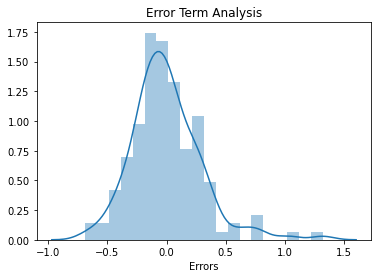

In [73]:
sns.distplot((y_train-y_train_pred),bins=20)
plt.title('Error Term Analysis')
plt.xlabel('Errors')
plt.show()

# Making Predictions Using the Model

In [74]:
df_test[sig_num_col]=scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

splitting test set into x_test and 

In [0]:
y_test=df_test.pop('price')
x_test=df_test

adding constant

In [0]:
x_test_1=sm.add_constant(x_test)

x_test_new=x_test_1[x_train_rfe10c.columns]

making prediction

In [0]:
y_pred=lm_rfe10.predict(x_test_new)

In [78]:
y_pred

160   -0.629560
186   -0.315218
59    -0.328200
165   -0.282638
140   -0.848831
         ...   
28    -0.423966
29     0.234036
182   -0.635958
40    -0.765185
128    2.111876
Length: 62, dtype: float64

# RMSE Score

In [79]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9094354289897943

# Conclusions
*   R-squared and Adjusted R-squared - 0.912 and 0.909
* p - values for all coefficients seems to be less than the significance level of 0.05 i.e all the predictors are statistically significant
*   90% variance explained

# Closing Statement : 
thus, we can say that the model is good enough to predict the car prices which explains the variance of data upto 90% and the model is significant.



 